# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#zip takes two lists and puts them together so that you can loop over them
a = [1,2,3]
b = [11,22,33]
for t in zip(a,b):
    print(t)
print(list(zip(a,b)))

for lat, lng in zip(a,b):
    print(lat, lng)
    

(1, 11)
(2, 22)
(3, 33)
[(1, 11), (2, 22), (3, 33)]
1 11
2 22
3 33


In [26]:
city_obj = citipy.nearest_city(54.5, -5.9)
print(city_obj.city_name, city_obj.country_code)

belfast gb


In [6]:
help(citipy.nearest_city)
citipy.nearest_city

Help on function nearest_city in module citipy.citipy:

nearest_city(latitude, longitude)



In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print theb city count to confirm sufficient count
len(cities)


627

In [27]:
cities

['punta arenas',
 'saint george',
 'teya',
 'bredasdorp',
 'georgetown',
 'ponta do sol',
 'cape town',
 'hobart',
 'dangriga',
 'mataura',
 'tual',
 'college',
 'faanui',
 'laguna',
 'la asuncion',
 'avarua',
 'erenhot',
 'clacton-on-sea',
 'skibbereen',
 'barrow',
 'nome',
 'vaini',
 'ushuaia',
 'sampit',
 'kapaa',
 'ribeira grande',
 'antofagasta',
 'kavaratti',
 'constitucion',
 'sergeyevka',
 'saint-augustin',
 'riyadh',
 'isangel',
 'port elizabeth',
 'butaritari',
 'ranong',
 'cidreira',
 'marshfield',
 'chuy',
 'hami',
 'boa vista',
 'albany',
 'omaruru',
 'upernavik',
 'hilo',
 'rikitea',
 'hithadhoo',
 'fortuna',
 'thompson',
 'kulunda',
 'bluff',
 'souillac',
 'mys shmidta',
 'dmanisi',
 'new norfolk',
 'batagay-alyta',
 'gornozavodsk',
 'waipawa',
 'new ipswich',
 'guerrero negro',
 'westerly',
 'nikolskoye',
 'tabarqah',
 'flin flon',
 'hambantota',
 'busselton',
 'pacific grove',
 'la ronge',
 'nanortalik',
 'sawtell',
 'te anau',
 'depalpur',
 'saskylakh',
 'la libertad'

In [24]:
#lats
#(list(lat_lngs))
lngs
for x in list(zip(lats, lngs)):
    print(x[1])

-99.18754745205189
-60.12112601585014
92.6061590882747
13.666908688916038
-12.843841806589069
-37.49309041928964
-6.671954522568285
150.7423506397875
-88.45072793054108
-152.40713617340413
135.3871497959077
-145.91818266019686
-154.87461243523637
-42.3286036479941
-64.06796549187885
-151.96642003167386
-166.78087104263818
112.85855401480683
1.4558676048803534
-11.903814614371555
-160.02150409980015
-164.60966958941987
-168.38331590290144
-17.813834989570267
112.53035707392672
-172.8973502875478
-37.314311334509114
-73.90588448358365
-144.0847551639813
-149.04694561971885
-168.62168262214684
65.84504820193402
-130.5414218808912
66.13531939951028
-58.28532216005654
45.559042100330856
169.83729132227307
29.730544728890408
178.00512417720722
-9.504172283219333
98.05009065021238
-27.2551499002237
-90.34311728527334
-27.27434005660561
25.26704868470324
92.43670276859336
-61.28351655524854
-164.100917822636
-165.6931981811523
112.60735831193028
15.854542297609726
-56.08693202528751
-153.18016

-116.93180256734152
149.30486016912795
142.19819019081882
-80.35431248231514
87.12536090102208
-31.12895018418874
-50.317868334044135
46.36987538498755
-13.476984453527933
-11.239608707456483
-140.71010729038622
178.64200314110036
-140.01899136372379
-124.33381110153053
-61.47198924972601
-16.06503307844727
-141.03721993334665
150.78772599710794
0.29130616719896807
43.7911456185885
81.51776128801151
-121.8044809563778
18.080077302265295
-72.20697087470373
-107.53862129288812
45.00563035486374
-119.3409395090863
-161.22249628288515
79.81057217389451
-46.74737325603462
-157.4253503947088
-67.99934981780608
-2.1989847171149677
-160.61127414184733
49.88416008445475
-132.74526876908791
-66.52283108510021
-96.21534682377884
177.22051479828667
-98.84079404771857
153.1681089831152
163.65220146518624
-28.736022472422206
-129.74070280872064
70.4201411028796
-106.28272680271233
-154.06041425002817
136.48218585403845
16.600912970795548
107.33519986448863
62.180902392215444
-54.33568031139981
58.34

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).



In [59]:
# get api key
api_key = api_keys.api_key

# get web address that we will pull from
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# append url to weathermap

city_url = url + "&q=" + cities[0]

# create empty library where we will store the info that we will get back

weatherlist = []
goodcities = []
goodlat = []
goodlong = []

#use get

#w_list = city_json["weather"]
#descr = w_list['description']

city_json = requests.get(city_url).json()

print(city_json)

for c in cities:
    city_url = url + "&q=" + c.replace(" ", "%20")
    city_json = requests.get(city_url).json()
    try:
        banana = city_json["weather"]
        
        goodcities.append(c)
        weatherlist.append(city_json)
        goodlat.append(city_json["coord"]["lat"])
        goodlong.append(city_json["coord"]["lon"])
            
    except:
        pass
    
    
    #print(city_url)
    


{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 51.21, 'pressure': 1012, 'humidity': 81, 'temp_min': 50, 'temp_max': 53.6}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1551306194, 'sys': {'type': 1, 'id': 8487, 'message': 0.0037, 'country': 'CL', 'sunrise': 1551262028, 'sunset': 1551311041}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}


In [60]:
#c=cities[0]
#c.replace(" ", "_")
weatherlist[0]["weather"][0]['description']

'light rain'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
temp = []
humidity = []
clouds = []
windspeed = []

   
for w in weatherlist:
    try:  
        w["main"]['temp']
        w["main"]['humidity']
        w["clouds"]["all"]
        w["wind"]["speed"]
        temp.append(w["main"]['temp'])
        humidity.append(w["main"]['humidity'])
        clouds.append( w["clouds"]["all"])
        windspeed.append( w["wind"]["speed"])

    except:
        pass 
    
print(temp)
    

[51.21, 40.15, 91.44, 66.67, 80.47, 69.04, 64.76, 60.19, 82.98, 55, 81.78, 18, 83.94, 77, 67.28, 84.2, 14.46, 44.83, 44.6, 57.57, 67.73, 53.65, 49.5, 77.01, 72.64, 60.8, 73.4, 82.5, 81.28, 1.86, 53.33, 75.2, 80.6, 34.88, 82.14, 79.84, 67.74, 23.92, 61.17, 13.38, 87.54, 11.16, 65.44, 5.19, 69.66, 80.02, 81.55, 50.81, 15.8, 12.57, 80.07, 49.33, 26.43, 60.19, -30.55, 18.19, 64, 19.31, 63.64, 23.02, 35.64, 19.4, 75.2, 61.77, 58.33, 15.8, 34.89, 68.86, 49.87, 47.62, -19.7, 59, 73.13, 62.6, 62.7, 50.91, 36.45, 14.4, 69.8, 41.9, 78.4, 68, 76.02, 22.69, 60.48, 47.53, -4.01, 80.97, 66.07, 11.4, 32.5, 7.18, 42.85, 80.82, 81.6, 18.93, 65.34, 74.67, 37.23, 36.82, 48.42, 54.1, 62.22, 71.47, 73.59, 87.8, 71.6, -20.29, 80.25, 38.76, -0.4, 41.79, 65.31, 74.94, 78.01, 34, 64.45, 55, 75.24, 69.09, 49.91, 23, 66.2, 78.85, 42.8, -9.94, 4.56, 80.6, 62.43, 10.4, 40.02, 81.1, 26.6, 75.2, 60.8, 41, 75, 17.17, 51.64, 3.03, 76.65, -17.23, -21.23, 41.32, 62.13, 78.8, 56.07, 56.62, 24.36, 17.7, 65.89, -9.08, 87.6

In [64]:
cities_df = pd.DataFrame({"city": goodcities, "latitude": goodlat, "longitude": goodlong, "temp": temp, "humidity": humidity, "clouds": clouds, "windspeed": windspeed})


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

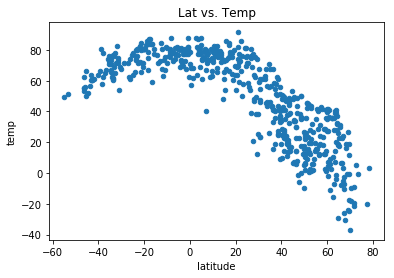

In [86]:
fig = cities_df.plot("latitude", "temp", kind="scatter", title="Lat vs. Temp")
fig = fig.get_figure()
fig.savefig("fig1.png")

#### Latitude vs. Humidity Plot

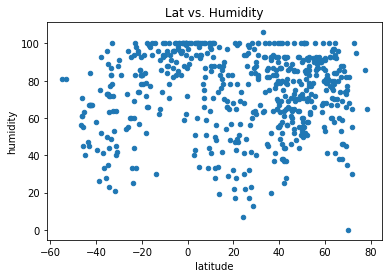

In [88]:
fig = cities_df.plot("latitude", "humidity", kind="scatter", title="Lat vs. Humidity")
fig = fig.get_figure()
fig.savefig("fig2.png")

#### Latitude vs. Cloudiness Plot

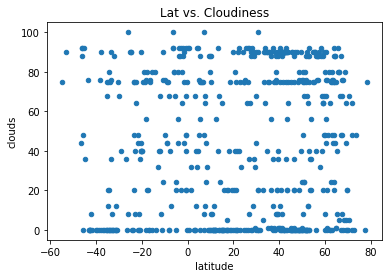

In [90]:
fig = cities_df.plot("latitude", "clouds", kind="scatter", title="Lat vs. Cloudiness")
fig = fig.get_figure()
fig.savefig("fig4.png")

#### Latitude vs. Wind Speed Plot

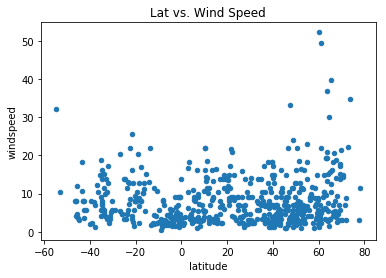

In [89]:
fig = cities_df.plot("latitude", "windspeed", kind="scatter", title="Lat vs. Wind Speed")
fig = fig.get_figure()
fig.savefig("fig3.png")